<a href="https://colab.research.google.com/github/hmdredwan/Co-Lab/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,roc_curve, roc_auc_score,auc
)
import matplotlib.pyplot as plt
import seaborn as sns

**Mount Drive**

In [3]:
print(" Reading Real Cancer Dataset....")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')


 Reading Real Cancer Dataset....
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Dataset**

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Assignments_Colab/Datasets/Breast_Cancer_Wisconsin_Dataset.csv')

In [5]:
data.shape
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Prepare Dataset**

In [6]:
data['diagnosis_numeric']=data['diagnosis'].map({'M':1,'B':0})
data.head()
important_features=[
    'radius_worst',
    'perimeter_worst',
    'area_worst',
    'concave points_worst',
    'concavity_worst'
]

#Creating Sample datasets
X=data[important_features]
y=data['diagnosis_numeric']

print(f"X(measurements):{X.shape}")
print(f"y(diagnosis):{y.shape}")

X(measurements):(569, 5)
y(diagnosis):(569,)


**Train and Test Split**

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=20)

print(f"Training: {len(X_train)} patients")
print(f"Testing: {len(X_test)} patients")
#showing some training examples
print (f"\n Training examples:")
print(X_train.head())

Training: 455 patients
Testing: 114 patients

 Training examples:
     radius_worst  perimeter_worst  area_worst  concave points_worst  \
412         9.965            66.61       301.0               0.02564   
461        36.040           251.20      4254.0               0.26250   
532        15.850           101.60       773.4               0.08704   
495        16.010           103.90       783.6               0.10170   
13         16.840           112.00       876.5               0.11190   

     concavity_worst  
412           0.1868  
461           0.6833  
532           0.1206  
495           0.1700  
13            0.2322  


**Train Model1 With Decision Tree with with depth 4**

In [8]:
cancer_detection_model=DecisionTreeClassifier(max_depth=4,random_state=20)

#Training Model
cancer_detection_model.fit(X_train,y_train)
print("Training Completed")

Training Completed


**Train Model_2 With Decision Tree with with depth 5**

In [18]:
cancer_detection_model_2=DecisionTreeClassifier(max_depth=5,random_state=20)
cancer_detection_model_2.fit(X_train,y_train)
print("Training Completed")

Training Completed


**Train Model_3 With Decision Tree with with depth 2**

In [20]:
cancer_detection_model_3=DecisionTreeClassifier(max_depth=2,random_state=20)
cancer_detection_model_3.fit(X_train,y_train)
print("Training Completed")

Training Completed


**Test Our 1st Model**

In [9]:
print("Now lets test our model")
predictions = cancer_detection_model.predict(X_test)
predictions_2 = cancer_detection_model_2.predict(X_test)
accuracy=accuracy_score(y_test,predictions)

print(f"Our model accuracy :{accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy> 0.95:
    print("EXCELLENT! Our model is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our model performs well!")
elif accuracy > 0.80:
    print("OK! Our model is decent!")
else:
    print("Needs improvement...")

Now lets test our model
Our model accuracy :0.965 (96.5%)
EXCELLENT! Our model is very accurate!


**Test Our 2nd Model(depth 5)**

In [19]:
print("Now lets test our 2nd model")
predictions_2 = cancer_detection_model_2.predict(X_test)
accuracy_2=accuracy_score(y_test,predictions)

print(f"Our 2nd model accuracy :{accuracy_2:.3f} ({accuracy_2*100:.1f}%)")

if accuracy_2> 0.95:
    print("EXCELLENT! Our model is very accurate!")
elif accuracy_2 > 0.90:
    print("GOOD! Our model performs well!")
elif accuracy_2 > 0.80:
    print("OK! Our model is decent!")
else:
    print("Needs improvement...")

Now lets test our 2nd model
Our 2nd model accuracy :0.965 (96.5%)
EXCELLENT! Our model is very accurate!


**Test Our 3rd Model(depth 2)**

In [21]:
print("Now lets test our 3rd model")
predictions_3 = cancer_detection_model_3.predict(X_test)
accuracy_3=accuracy_score(y_test,predictions)

print(f"Our 3rd model accuracy :{accuracy_3:.3f} ({accuracy_3*100:.1f}%)")

if accuracy_3> 0.95:
    print("EXCELLENT! Our model is very accurate!")
elif accuracy_3 > 0.90:
    print("GOOD! Our model performs well!")
elif accuracy_3 > 0.80:
    print("OK! Our model is decent!")
else:
    print("Needs improvement...")

Now lets test our 3rd model
Our 3rd model accuracy :0.965 (96.5%)
EXCELLENT! Our model is very accurate!


#Accuracy come same for 3 models with 3 different depth


**Confusion Matrix**

Confusion Matrix:
[[66  0]
 [ 4 44]]
Correct:110
Incorrect:4


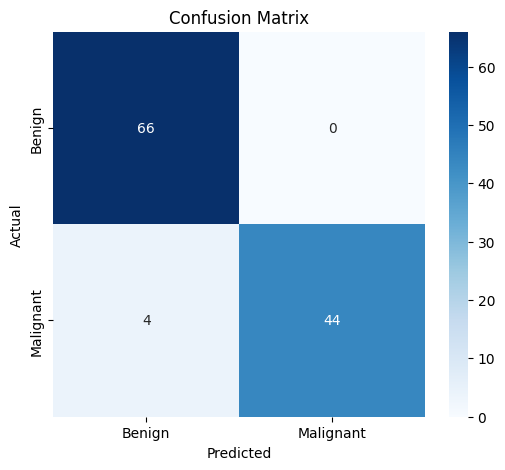

In [14]:
cm = confusion_matrix(y_test,predictions)
print("Confusion Matrix:")
print(cm)
print(f"Correct:{cm[0][0]+cm[1][1]}")
print(f"Incorrect:{cm[0][1]+cm[1][0]}")

#Plot the diagram
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', xticklabels=['Benign', 'Malignant'],yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Detailed Performance**

In [16]:
accuracy= accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print (f"Accuracy: {accuracy:.3f}")
print (f"Precision: {precision:.3f}")
print (f"Recall: {recall:.3f}")
print (f"F1 Score: {f1:.3f}")

Accuracy: 0.965
Precision: 1.000
Recall: 0.917
F1 Score: 0.957


**Plot Bar Chart**

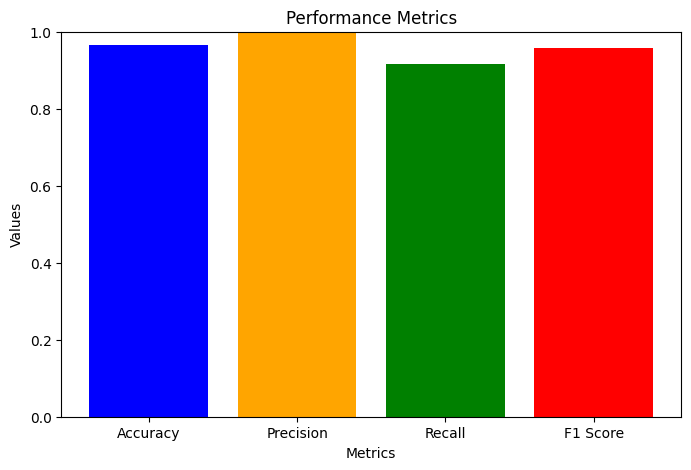

In [17]:
plt.figure(figsize=(8,5))
metrics=['Accuracy','Precision','Recall','F1 Score']
values=[accuracy,precision,recall,f1]
plt.bar(metrics,values,color=['blue','orange','green','red'])
plt.title('Performance Metrics')
plt.ylim(0,1)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()